In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import mplfinance as mpf
import requests
from sklearn.metrics import mean_squared_error

In [2]:
#API Key

key = "XTL1OOAD2EJD1V6Y"

In [5]:
#API

base_url = "https://www.alphavantage.co/query"
function = "TIME_SERIES_DAILY"
symbol = "TSLA"
outputsize = "full"  
interval = "daily"  

In [6]:
#API Parameters

params = {
    "function": function,
    "symbol": symbol,
    "outputsize": outputsize,
    "apikey": key,
    #"interval": interval,  
}

In [7]:
#Calling API

response = requests.get(base_url, params=params)

In [8]:
#Converting fetched data into json format

data = response.json()

In [9]:
data

{'Meta Data': {'1. Information': 'Daily Prices (open, high, low, close) and Volumes',
  '2. Symbol': 'TSLA',
  '3. Last Refreshed': '2023-12-08',
  '4. Output Size': 'Full size',
  '5. Time Zone': 'US/Eastern'},
 'Time Series (Daily)': {'2023-12-08': {'1. open': '240.2700',
   '2. high': '245.2700',
   '3. low': '239.2701',
   '4. close': '243.8400',
   '5. volume': '103126829'},
  '2023-12-07': {'1. open': '241.5500',
   '2. high': '244.0800',
   '3. low': '236.9800',
   '4. close': '242.6400',
   '5. volume': '107142262'},
  '2023-12-06': {'1. open': '242.9200',
   '2. high': '246.5700',
   '3. low': '239.1709',
   '4. close': '239.3700',
   '5. volume': '125905295'},
  '2023-12-05': {'1. open': '233.8700',
   '2. high': '246.6600',
   '3. low': '233.7000',
   '4. close': '238.7200',
   '5. volume': '137971115'},
  '2023-12-04': {'1. open': '235.7500',
   '2. high': '239.3733',
   '3. low': '233.2902',
   '4. close': '235.5800',
   '5. volume': '104099817'},
  '2023-12-01': {'1. open

In [10]:
ts_data = data["Time Series (Daily)"]

In [11]:
#json to dataframe

df = pd.DataFrame.from_dict(ts_data, orient="index")  

In [12]:
df.head()

,1. open,2. high,3. low,4. close,5. volume
2023-12-08,240.2700,245.2700,239.2701,243.8400,103126829
2023-12-07,241.5500,244.0800,236.9800,242.6400,107142262
2023-12-06,242.9200,246.5700,239.1709,239.3700,125905295
2023-12-05,233.8700,246.6600,233.7000,238.7200,137971115
2023-12-04,235.7500,239.3733,233.2902,235.5800,104099817


In [13]:
#renaming dataframe columns 

columns = ['open', 'high', 'low', 'close', 'volume']  

df.columns = columns 

In [14]:
df.head()

,open,high,low,close,volume
2023-12-08,240.2700,245.2700,239.2701,243.8400,103126829
2023-12-07,241.5500,244.0800,236.9800,242.6400,107142262
2023-12-06,242.9200,246.5700,239.1709,239.3700,125905295
2023-12-05,233.8700,246.6600,233.7000,238.7200,137971115
2023-12-04,235.7500,239.3733,233.2902,235.5800,104099817


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3386 entries, 2023-12-08 to 2010-06-29
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   open    3386 non-null   object
 1   high    3386 non-null   object
 2   low     3386 non-null   object
 3   close   3386 non-null   object
 4   volume  3386 non-null   object
dtypes: object(5)
memory usage: 158.7+ KB


In [16]:
#datatype conversion from object(string) to float/int(numeric)

df = df.apply(pd.to_numeric, errors='coerce')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3386 entries, 2023-12-08 to 2010-06-29
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   open    3386 non-null   float64
 1   high    3386 non-null   float64
 2   low     3386 non-null   float64
 3   close   3386 non-null   float64
 4   volume  3386 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 158.7+ KB


In [18]:
sns.set_theme(style="dark")

In [18]:
#creating new column of "datetime" datatype

df['Date'] = pd.to_datetime(df.index)  

In [19]:
df1 = df.sort_values('Date')

In [20]:
df1.head()

,open,high,low,close,volume,Date
2010-06-29,19.00,25.0000,17.54,23.89,18766300,2010-06-29
2010-06-30,25.79,30.4192,23.30,23.83,17187100,2010-06-30
2010-07-01,25.00,25.9200,20.27,21.96,8218800,2010-07-01
2010-07-02,23.00,23.1000,18.71,19.20,5139800,2010-07-02
2010-07-06,20.00,20.0000,15.83,16.11,6866900,2010-07-06


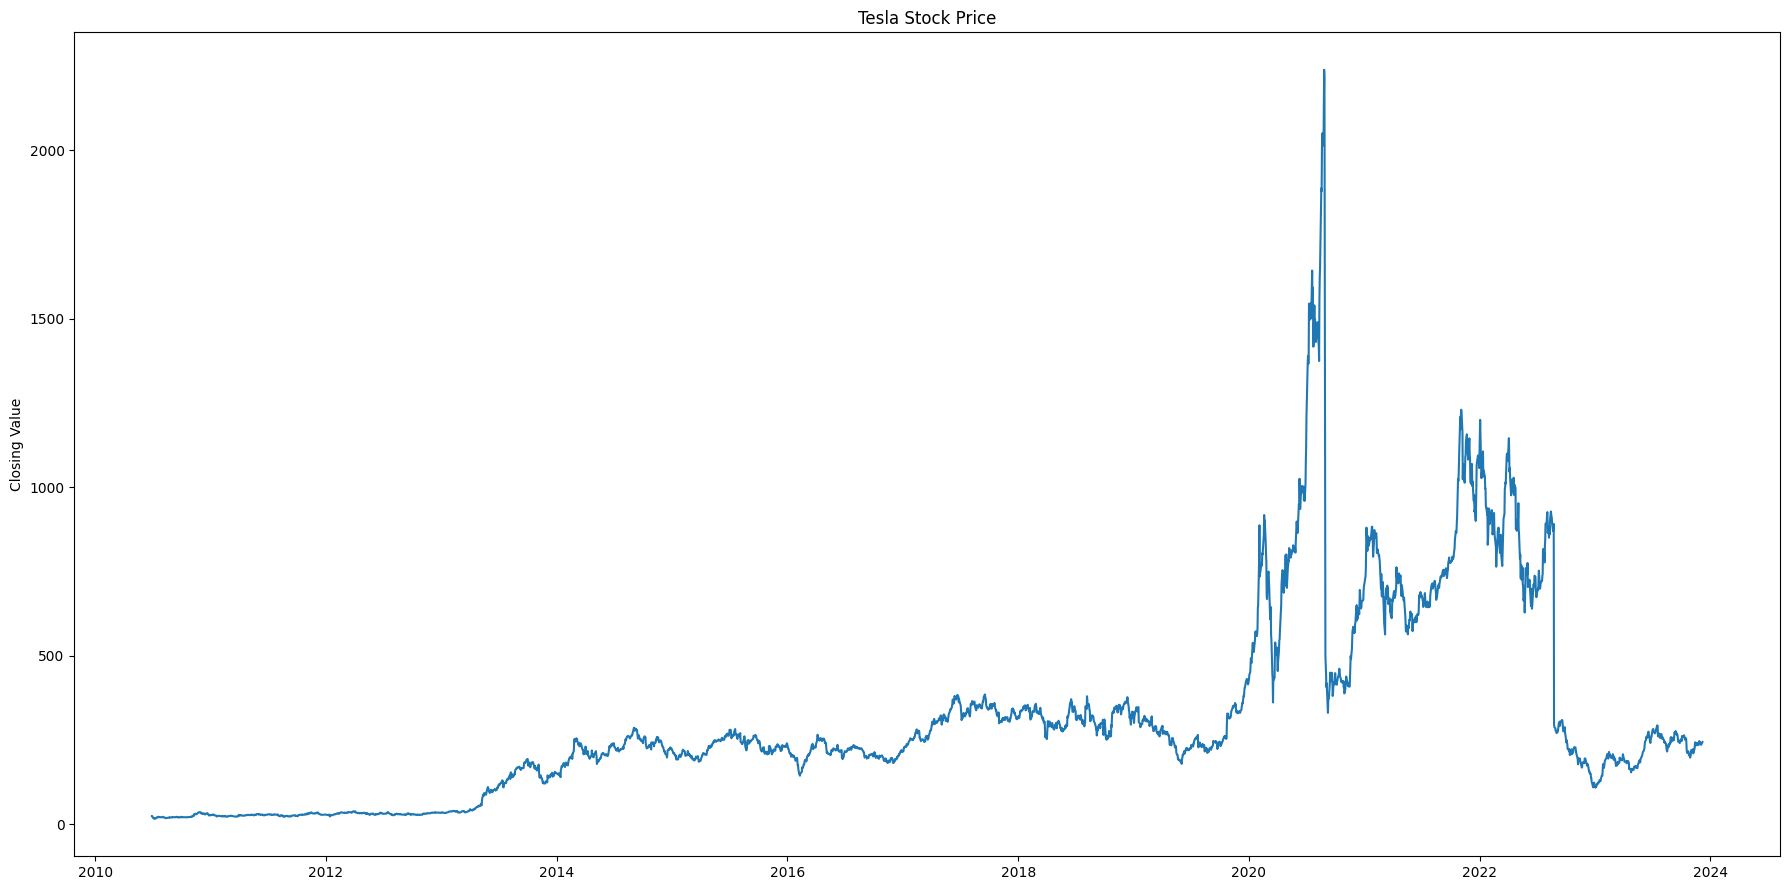

In [21]:
#lineplotting closing value of last 100 days

plt.figure(figsize=(18,9))
sns.lineplot(data=df1, x='Date', y='close')
plt.xlabel('')
plt.ylabel('Closing Value')
plt.title("Tesla Stock Price")
plt.tight_layout()
plt.show()

In [22]:
df1['Date']=pd.to_datetime(df1['Date'])

In [23]:
df1.index=df1['Date']

In [27]:
df1 = df1.drop(columns='Date')

C:\Users\Adit\AppData\Local\Programs\Python\Python311\Lib\site-packages\mplfinance\_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


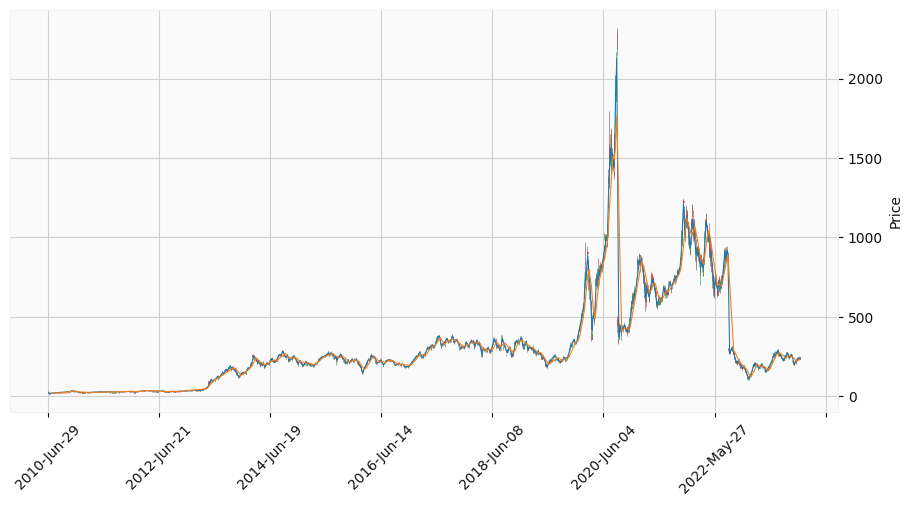

In [28]:
mpf.plot(df1, type='candle', style='yahoo', mav=(5,20), figratio=(18,9))  #candlestick plotting using mpl finance lib
plt.show()

# Machine Learning

In [30]:
total_rows = len(df1)

total_rows

3386

### Seperating training_size and test_size 


In [31]:
train_size = int(0.7*total_rows)

In [32]:
test_size = int(0.3*total_rows)

In [40]:
train_size

2370

In [41]:
test_size

1015

### Spliting data 

In [34]:
train_data = df1[:train_size]

In [35]:
test_data = df1[train_size:(train_size+test_size)]

In [36]:
test_data.head()

,open,high,low,close,volume
Date,,,,,
2019-11-26,335.27,335.50,327.10,328.92,7956239
2019-11-27,331.12,333.93,328.57,331.29,5563459
2019-11-29,331.11,331.26,327.50,329.94,2465629
2019-12-02,329.40,336.38,328.69,334.87,6081986
2019-12-03,332.62,337.91,332.19,336.20,6613476


In [37]:
train_data.head()

,open,high,low,close,volume
Date,,,,,
2010-06-29,19.00,25.0000,17.54,23.89,18766300
2010-06-30,25.79,30.4192,23.30,23.83,17187100
2010-07-01,25.00,25.9200,20.27,21.96,8218800
2010-07-02,23.00,23.1000,18.71,19.20,5139800
2010-07-06,20.00,20.0000,15.83,16.11,6866900


In [38]:
len(train_data)

2370

In [39]:
len(test_data)

1015

In [43]:
#from tensorflow.keras.callbacks import EarlyStopping

In [42]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2370 entries, 2010-06-29 to 2019-11-25
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   open    2370 non-null   float64
 1   high    2370 non-null   float64
 2   low     2370 non-null   float64
 3   close   2370 non-null   float64
 4   volume  2370 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 111.1 KB


In [43]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1015 entries, 2019-11-26 to 2023-12-07
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   open    1015 non-null   float64
 1   high    1015 non-null   float64
 2   low     1015 non-null   float64
 3   close   1015 non-null   float64
 4   volume  1015 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 47.6 KB


## Moving Average Calculation and Visualization

In [44]:
close_price = train_data['close'].values

In [45]:
close_price

array([ 23.89,  23.83,  21.96, ..., 354.83, 333.04, 336.34])

In [46]:
window = 20

ma = df1['close'].ewm(span=window, adjust=True).mean()

In [47]:
ma

Date
2010-06-29     23.890000
2010-06-30     23.858500
2010-07-01     23.161382
2010-07-02     22.017792
2010-07-06     20.588748
                 ...    
2023-12-04    234.386463
2023-12-05    234.799181
2023-12-06    235.234497
2023-12-07    235.939783
2023-12-08    236.692185
Name: close, Length: 3386, dtype: float64

In [48]:
ma.info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 3386 entries, 2010-06-29 to 2023-12-08
Series name: close
Non-Null Count  Dtype  
--------------  -----  
3386 non-null   float64
dtypes: float64(1)
memory usage: 52.9 KB


In [49]:
ind = ma.index

In [50]:
ind

DatetimeIndex(['2010-06-29', '2010-06-30', '2010-07-01', '2010-07-02',
               '2010-07-06', '2010-07-07', '2010-07-08', '2010-07-09',
               '2010-07-12', '2010-07-13',
               ...
               '2023-11-27', '2023-11-28', '2023-11-29', '2023-11-30',
               '2023-12-01', '2023-12-04', '2023-12-05', '2023-12-06',
               '2023-12-07', '2023-12-08'],
              dtype='datetime64[ns]', name='Date', length=3386, freq=None)

In [51]:
fil_d = df1[df1.index.isin(ind)]

In [52]:
fil_d

,open,high,low,close,volume
Date,,,,,
2010-06-29,19.00,25.0000,17.5400,23.89,18766300
2010-06-30,25.79,30.4192,23.3000,23.83,17187100
2010-07-01,25.00,25.9200,20.2700,21.96,8218800
2010-07-02,23.00,23.1000,18.7100,19.20,5139800
2010-07-06,20.00,20.0000,15.8300,16.11,6866900
...,...,...,...,...,...
2023-12-04,235.75,239.3733,233.2902,235.58,104099817
2023-12-05,233.87,246.6600,233.7000,238.72,137971115
2023-12-06,242.92,246.5700,239.1709,239.37,125905295


In [53]:
avg = ma.values

In [54]:
avg

array([ 23.89      ,  23.8585    ,  23.16138218, ..., 235.23449709,
       235.93978309, 236.6921847 ])

In [55]:
mav = pd.DataFrame(avg, columns=['price'], index=ma.index)

In [56]:
mav

,price
Date,
2010-06-29,23.890000
2010-06-30,23.858500
2010-07-01,23.161382
2010-07-02,22.017792
2010-07-06,20.588748
...,...
2023-12-04,234.386463
2023-12-05,234.799181
2023-12-06,235.234497


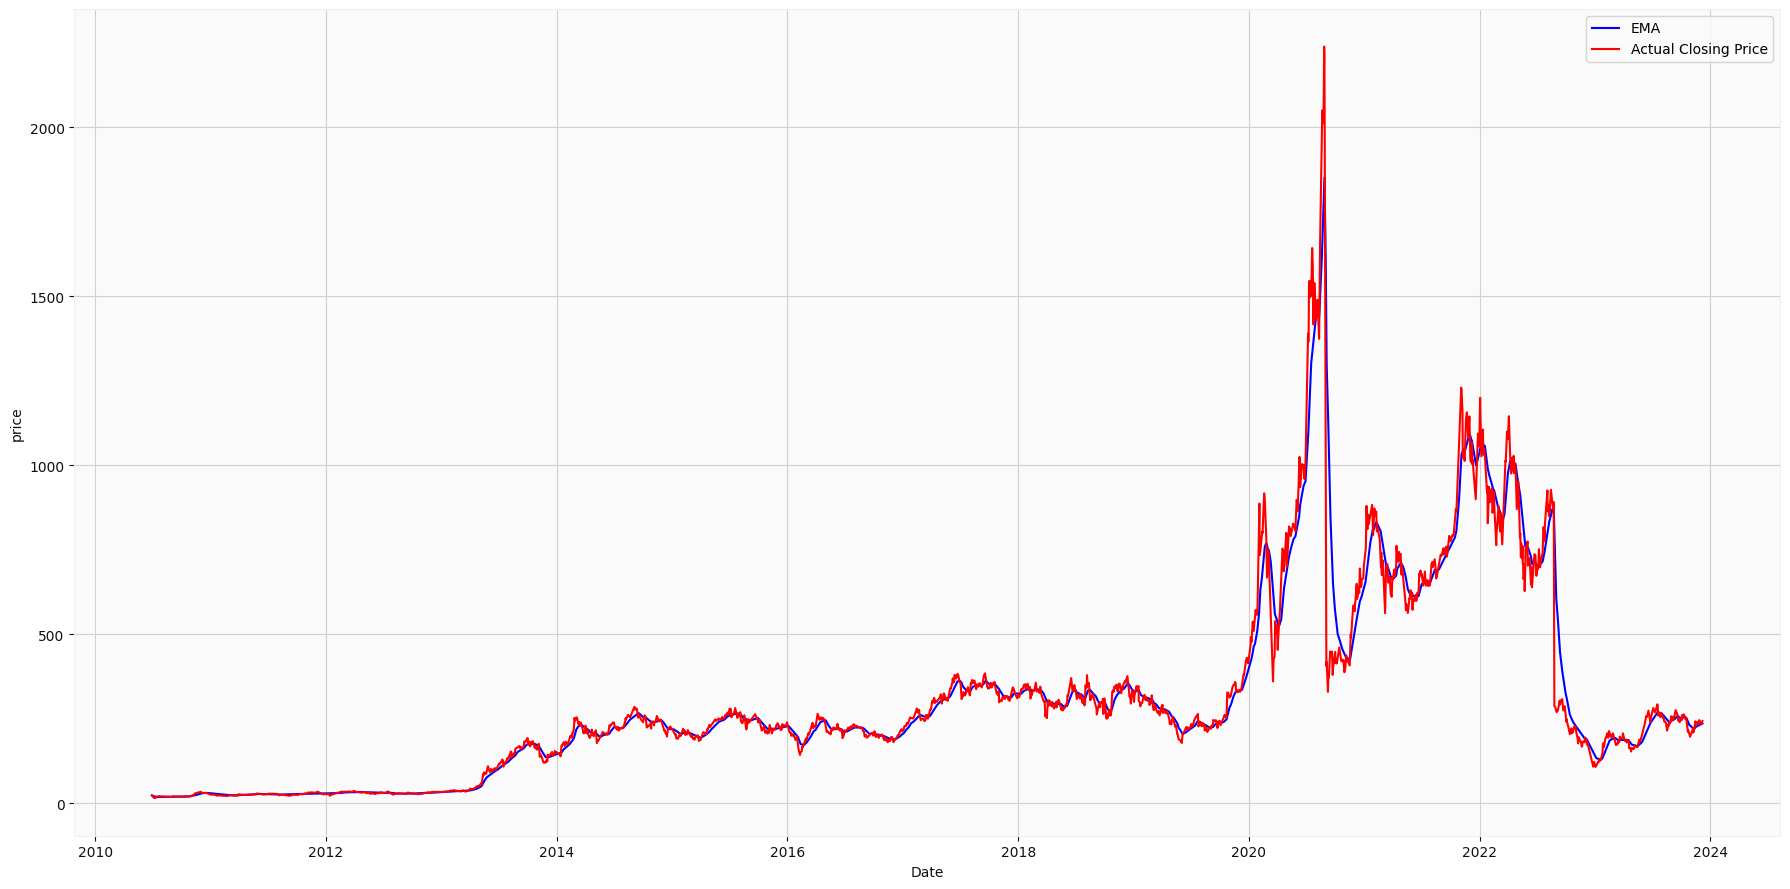

In [59]:
plt.figure(figsize=(18,9))
sns.lineplot(data=mav, x='Date', y='price', color='blue', label='EMA')
sns.lineplot(data=fil_d, x='Date', y='close', color='red', label='Actual Closing Price')
plt.legend()
plt.tight_layout()
plt.show()

In [60]:
#normalising data 

scaler = MinMaxScaler()
scaled_train_data = scaler.fit_transform(train_data)
scaled_test_data = scaler.transform(test_data)

In [61]:
scaled_train_data

array([[0.00771826, 0.02244088, 0.00702592, 0.02191224, 0.50337694],
       [0.02604237, 0.03697035, 0.02283425, 0.02174973, 0.46074816],
       [0.0239104 , 0.0249075 , 0.01451841, 0.01668472, 0.21865873],
       ...,
       [0.91315612, 0.9228645 , 0.93044063, 0.91828277, 0.16173433],
       [0.8744299 , 0.8696713 , 0.86457261, 0.85926327, 0.45220573],
       [0.88565646, 0.87924285, 0.87681309, 0.86820152, 0.33006163]])

In [62]:
scaled_test_data

array([[0.8612333 , 0.8549252 , 0.85661356, 0.84810401, 0.21157118],
       [0.85003373, 0.85071586, 0.86064798, 0.85452329, 0.1469807 ],
       [0.85000675, 0.8435573 , 0.85771136, 0.85086674, 0.06335818],
       ...,
       [0.58758602, 0.61673548, 0.60027719, 0.60379198, 3.72118036],
       [0.61200918, 0.61649418, 0.61529208, 0.60555255, 3.39547677],
       [0.60831197, 0.60981822, 0.60927916, 0.61440953, 2.88898924]])

In [63]:
x_train = []
y_train = []

In [64]:
sequence_length = 10

In [65]:
for i in range(len(scaled_train_data)-sequence_length):
    x_train.append(scaled_train_data[i:i+sequence_length])
    y_train.append(scaled_train_data[i+sequence_length])

In [66]:
x_test = []
y_test = []

In [67]:
for i in range(len(scaled_test_data)-sequence_length):
    x_test.append(scaled_test_data[i:i+sequence_length])
    y_test.append(scaled_test_data[i+sequence_length])

In [68]:
x_train, y_train = np.array(x_train), np.array(y_train)
x_test, y_test = np.array(x_test), np.array(y_test)

In [69]:
x_train

array([[[7.71825665e-03, 2.24408815e-02, 7.02592181e-03, 2.19122427e-02,
         5.03376937e-01],
        [2.60423695e-02, 3.69703469e-02, 2.28342459e-02, 2.17497291e-02,
         4.60748163e-01],
        [2.39104035e-02, 2.49075017e-02, 1.45184087e-02, 1.66847237e-02,
         2.18658727e-01],
        ...,
        [3.88611523e-03, 3.40500831e-03, 4.30886611e-03, 4.33369447e-03,
         1.06142733e-01],
        [4.88463095e-03, 3.86079683e-03, 5.54389143e-03, 3.38569881e-03,
         5.62552976e-02],
        [3.38361894e-03, 5.38902890e-03, 5.26944136e-03, 6.33802817e-03,
         6.91475865e-02]],

       [[2.60423695e-02, 3.69703469e-02, 2.28342459e-02, 2.17497291e-02,
         4.60748163e-01],
        [2.39104035e-02, 2.49075017e-02, 1.45184087e-02, 1.66847237e-02,
         2.18658727e-01],
        [1.85130212e-02, 1.73467746e-02, 1.02369876e-02, 9.20910076e-03,
         1.35544494e-01],
        ...,
        [4.88463095e-03, 3.86079683e-03, 5.54389143e-03, 3.38569881e-03,
        

In [70]:
y_train

array([[0.00485764, 0.0094375 , 0.00762999, 0.01094258, 0.11004605],
       [0.01025503, 0.013057  , 0.01103289, 0.01107801, 0.09775303],
       [0.01230603, 0.01252078, 0.01391462, 0.01310943, 0.06756034],
       ...,
       [0.91315612, 0.9228645 , 0.93044063, 0.91828277, 0.16173433],
       [0.8744299 , 0.8696713 , 0.86457261, 0.85926327, 0.45220573],
       [0.88565646, 0.87924285, 0.87681309, 0.86820152, 0.33006163]])

In [71]:
x_train.shape

(2360, 10, 5)

In [72]:
y_train.shape

(2360, 5)

In [73]:
x_test.shape

(1005, 10, 5)

In [74]:
y_test.shape

(1005, 5)

In [75]:
len(df1.columns)

5

In [76]:
#Neural Network model

model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(100, activation='relu', input_shape=(sequence_length, 5)),
    tf.keras.layers.Dense(50),
    tf.keras.layers.Dense(5)
])

In [77]:
#compile the model

model.compile(optimizer='adam', loss='mean_squared_error')

In [78]:
#train the model

model.fit(x_train, y_train, epochs=50, batch_size=16)

Epoch 1/50

148/148 [==============================] - 3s 4ms/step - loss: 0.0142
Epoch 2/50
148/148 [==============================] - 1s 4ms/step - loss: 0.0021
Epoch 3/50
148/148 [==============================] - 1s 4ms/step - loss: 0.0019
Epoch 4/50
148/148 [==============================] - 1s 4ms/step - loss: 0.0018
Epoch 5/50
148/148 [==============================] - 1s 4ms/step - loss: 0.0017
Epoch 6/50
148/148 [==============================] - 1s 5ms/step - loss: 0.0016
Epoch 7/50
148/148 [==============================] - 1s 4ms/step - loss: 0.0017
Epoch 8/50
148/148 [==============================] - 1s 4ms/step - loss: 0.0017
Epoch 9/50
148/148 [==============================] - 1s 4ms/step - loss: 0.0016
Epoch 10/50
148/148 [==============================] - 1s 4ms/step - loss: 0.0016
Epoch 11/50
148/148 [==============================] - 1s 4ms/step - loss: 0.0016
Epoch 12/50
148/148 [==============================] - 1s 4ms/step - loss: 0.0015
Epoch 13/50
148/148 [===

In [79]:
test_loss = model.evaluate(x_test)

test_loss

32/32 [==============================] - 0s 3ms/step - loss: 0.0000e+00


0.0

In [98]:
history = model.fit(x_train, y_train, epochs=50, batch_size=16, validation_split=0.3)

Epoch 1/50
104/104 [==============================] - 1s 6ms/step - loss: 9.3684e-04 - val_loss: 0.0026
Epoch 2/50
104/104 [==============================] - 1s 5ms/step - loss: 9.3827e-04 - val_loss: 0.0024
Epoch 3/50
104/104 [==============================] - 1s 5ms/step - loss: 9.3399e-04 - val_loss: 0.0026
Epoch 4/50
104/104 [==============================] - 1s 5ms/step - loss: 9.7401e-04 - val_loss: 0.0025
Epoch 5/50
104/104 [==============================] - 1s 5ms/step - loss: 9.3224e-04 - val_loss: 0.0023
Epoch 6/50
104/104 [==============================] - 1s 5ms/step - loss: 9.2953e-04 - val_loss: 0.0027
Epoch 7/50
104/104 [==============================] - 1s 5ms/step - loss: 9.4394e-04 - val_loss: 0.0024
Epoch 8/50
104/104 [==============================] - 1s 6ms/step - loss: 9.4077e-04 - val_loss: 0.0029
Epoch 9/50
104/104 [==============================] - 1s 5ms/step - loss: 9.3506e-04 - val_loss: 0.0026
Epoch 10/50
104/104 [==============================] - 1s 5ms/st

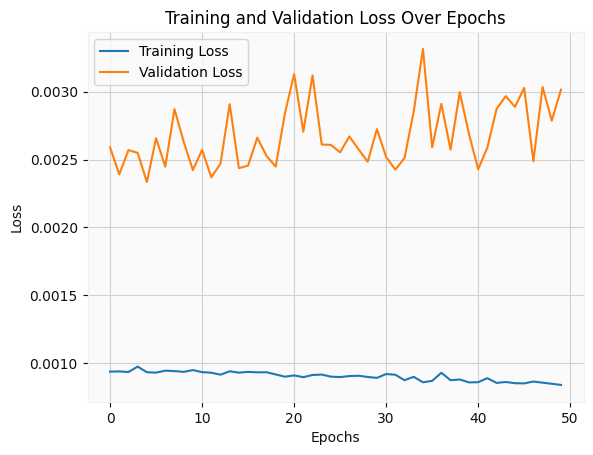

In [99]:
# Plot the training loss and validation loss over epochs

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [80]:
#predict using the created neural network

predicted_prices = model.predict(x_test)

32/32 [==============================] - 0s 3ms/step


In [81]:
predicted_prices

array([[0.8990463 , 0.90927774, 0.9029137 , 0.8974882 , 0.18951158],
       [0.91489625, 0.92406297, 0.9200922 , 0.9135582 , 0.16388184],
       [0.9268702 , 0.9370472 , 0.9322617 , 0.92566055, 0.17950119],
       ...,
       [0.7273116 , 0.91160786, 0.6755705 , 0.82631034, 1.4048376 ],
       [0.80793357, 1.036227  , 0.75362074, 0.9464108 , 2.1776319 ],
       [0.70214653, 0.90571404, 0.6480417 , 0.79207975, 1.5875363 ]],
      dtype=float32)

In [82]:
#retransforming the scaled data into real data

predictions_x = scaler.inverse_transform(predicted_prices)

In [83]:
predictions_y = scaler.inverse_transform(y_test)

In [85]:
#cost function and error

rmse = np.sqrt(mean_squared_error(y_test, predicted_prices))

In [86]:
rmse

0.5454829322389667

In [87]:
scaled_train_data.shape

(2370, 5)

In [88]:
predictions_x.shape

(1005, 5)

In [89]:
predicted_prices.shape[0]

1005

In [90]:
train = df1[:train_size+1]
valid = df1[train_size:train_size + len(predicted_prices)]
valid.loc[:, 'Predictions'] = predictions_x[:, 3]


C:\Users\Adit\AppData\Local\Temp\ipykernel_3492\4271483604.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid.loc[:, 'Predictions'] = predictions_x[:, 3]


In [91]:
train

,open,high,low,close,volume
Date,,,,,
2010-06-29,19.00,25.0000,17.54,23.89,18766300
2010-06-30,25.79,30.4192,23.30,23.83,17187100
2010-07-01,25.00,25.9200,20.27,21.96,8218800
2010-07-02,23.00,23.1000,18.71,19.20,5139800
2010-07-06,20.00,20.0000,15.83,16.11,6866900
...,...,...,...,...,...
2019-11-20,360.00,361.2000,349.57,352.22,6733965
2019-11-21,354.51,360.8400,354.00,354.83,6110013
2019-11-22,340.16,341.0000,330.00,333.04,16870642


In [92]:
valid

,open,high,low,close,volume,Predictions
Date,,,,,,
2019-11-26,335.27,335.50,327.10,328.92,7956239,347.152649
2019-11-27,331.12,333.93,328.57,331.29,5563459,353.085693
2019-11-29,331.11,331.26,327.50,329.94,2465629,357.553864
2019-12-02,329.40,336.38,328.69,334.87,6081986,356.932556
2019-12-03,332.62,337.91,332.19,336.20,6613476,379.758667
...,...,...,...,...,...,...
2023-11-16,239.49,240.88,230.96,233.59,136816819,343.795319
2023-11-17,232.00,237.39,226.54,234.30,142766234,328.927917
2023-11-20,234.04,237.10,231.02,235.60,116562402,320.873779


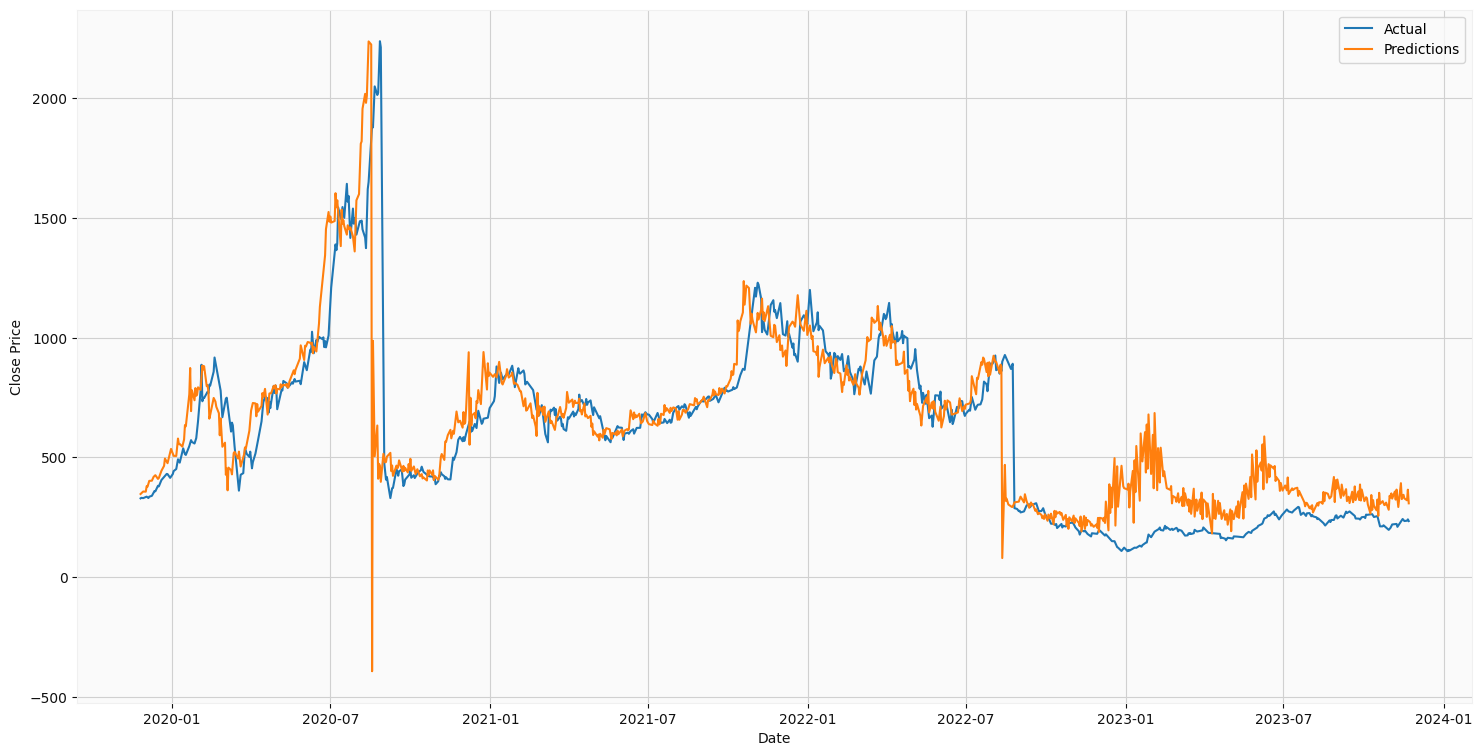

In [95]:
#visualising real stock value with the predicted values

plt.figure(figsize=(18,9))
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.plot(valid['close'])
plt.plot(valid['Predictions'])
plt.legend([ 'Actual','Predictions'])
plt.show()